## 导入 tf，np 以及绘图库

In [157]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 以下是 TF 的基础变量声明操作 以及 Tape求解的基础用法

## 构建一个基础的线性分类器 通过 NP 以及 TF 手动构建神经网络和训练函数

### 准备数据

In [158]:
# 生成点云数据 作为训练数据
num_samples_per_class = 100

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# 将两组不同的数据拼接在一起
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [159]:
# 因为我们直接生成了指定数量 num_samples_per_class 的样本，所以我们直接为 所有的样本生成标记
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

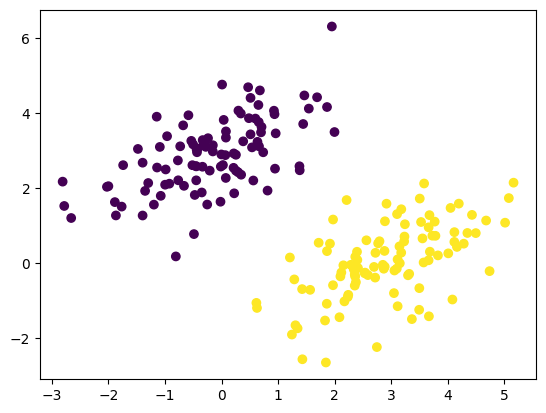

In [160]:
# 绘图 看一下， scatter 函数中的 c 参数 是 color 的意思
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### 构建网络

In [161]:
# 开始构建神经网络
# 随机初始化权重 以及 偏置
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [162]:
# 定义推理模型
def model(inputs):
    return tf.matmul(inputs, W) + b

In [163]:
# 定义损失函数 为 方差
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return  tf.reduce_mean(per_sample_losses)

In [164]:
# 定义训练流程，通过 tape 进行求导并进行更新，反向传播
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        loss = square_loss(targets, model(inputs))
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

### 训练与测试

In [165]:
# 正式开始训练，训练40次，批量训练
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.5843
Loss at step 1: 0.4172
Loss at step 2: 0.1746
Loss at step 3: 0.1450
Loss at step 4: 0.1320
Loss at step 5: 0.1213
Loss at step 6: 0.1117
Loss at step 7: 0.1030
Loss at step 8: 0.0951
Loss at step 9: 0.0880
Loss at step 10: 0.0816
Loss at step 11: 0.0757
Loss at step 12: 0.0705
Loss at step 13: 0.0657
Loss at step 14: 0.0615
Loss at step 15: 0.0576
Loss at step 16: 0.0541
Loss at step 17: 0.0509
Loss at step 18: 0.0480
Loss at step 19: 0.0455
Loss at step 20: 0.0431
Loss at step 21: 0.0410
Loss at step 22: 0.0391
Loss at step 23: 0.0374
Loss at step 24: 0.0358
Loss at step 25: 0.0344
Loss at step 26: 0.0331
Loss at step 27: 0.0320
Loss at step 28: 0.0309
Loss at step 29: 0.0300
Loss at step 30: 0.0291
Loss at step 31: 0.0284
Loss at step 32: 0.0277
Loss at step 33: 0.0270
Loss at step 34: 0.0265
Loss at step 35: 0.0259
Loss at step 36: 0.0255
Loss at step 37: 0.0251
Loss at step 38: 0.0247
Loss at step 39: 0.0243


In [166]:
# 传入一个输入 试试看 玩一下
input = tf.Variable(initial_value=[[4.,2.]])
print(input.shape)
print(input)
model(input)

(1, 2)
<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[4., 2.]], dtype=float32)>


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.8816406]], dtype=float32)>

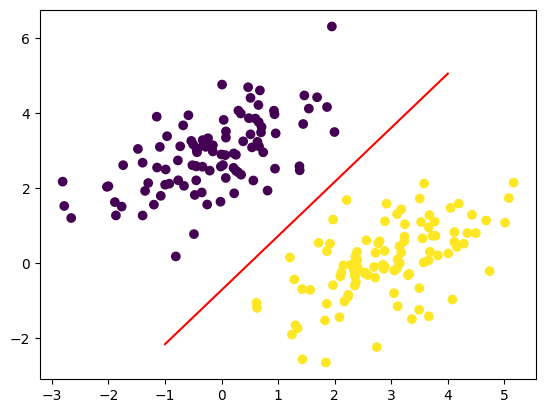

In [167]:
# 将inputs 再次输入到模型 查看其训练结果如何
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
